# Определение перспективного тарифа для телеком компании

Клиентам предлагают два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.
Необходимо сделать предварительный анализ тарифов на небольшой выборке клиентов. В распоряжении данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.<br><br>
**Описание тарифов:**


*Тариф «Смарт»*


1. Ежемесячная плата: 550 рублей
2. Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика
3. Стоимость услуг сверх тарифного пакета:
    - минута разговора: 3 рубля
    - сообщение: 3 рубля
    - 1 Гб интернет-трафика: 200 рублей


*Тариф «Ультра»*


1. Ежемесячная плата: 1950 рублей
2. Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика
3. Стоимость услуг сверх тарифного пакета:
    - минута разговора: 1 рубль
    - сообщение: 1 рубль
    - 1 Гб интернет-трафика: 150 рублей
* * * * *
**План действий для выполнения поставленной задачи:**<br>
[1. Открыть файл с данными и изучить общую информацию](#1) <br><br>
[2. Подготовить данные:](#2)
  - привести данные к нужным типам;
  - найти и исправить ошибки в данных
  - посчитать для каждого пользователя:
    + количество сделанных звонков и израсходованных минут разговора по месяцам;
    + количество отправленных сообщений по месяцам;
    + объем израсходованного интернет-трафика по месяцам;
    + помесячную выручку с каждого пользователя.

[3. Проанализировать данные:](#3)
  - описать поведение пользователей;
  - ответить на вопрос: Сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц?
  - посчитать среднее количество, дисперсию и стандартное отклонение;
  - построить гистограммы;
  - описать распределения.

[4. Проверить гипотезы:](#4)
  - средняя выручка пользователей тарифов «Ультра» и «Смарт» различается;
  - средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов;


[5. Написать общий вывод](#5)

<a id="1"></a>
### Шаг 1. Открыть файл с данными и изучить общую информацию.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)
import scipy.stats as st
from scipy import stats as st

calls = pd.read_csv('/datasets/calls.csv')
internet = pd.read_csv('/datasets/internet.csv', index_col=0)
messages = pd.read_csv('/datasets/messages.csv')
tariffs = pd.read_csv('/datasets/tariffs.csv')
users = pd.read_csv('/datasets/users.csv')

for data in [calls, internet, messages, users, tariffs]:
    display(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


None

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149396 entries, 0 to 149395
Data columns (total 4 columns):
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 5.7+ MB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mb_per_month_included    2 non-null int64
minutes_included         2 non-null int64
rub_monthly_fee          2 non-null int64
rub_per_gb               2 non-null int64
rub_per_message          2 non-null int64
rub_per_minute           2 non-null int64
tariff_name              2 non-null object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


None

In [ ]:
for data in [calls, internet, messages, users, tariffs]:
    display(data.head())

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


,id,mb_used,session_date,user_id
0,1000_0,112.95,2018-11-25,1000
1,1000_1,1052.81,2018-09-07,1000
2,1000_2,1197.26,2018-06-25,1000
3,1000_3,550.27,2018-08-22,1000
4,1000_4,302.56,2018-09-24,1000


,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


Проверим есть ли в данных дубликаты в таблицах calls, internet, messages, users, tariffs:

In [ ]:
for data in [calls, internet, messages, users, tariffs]: 
    print('Количество дубликатов в таблице:', data.duplicated().sum(), end='\n\n')

Количество дубликатов в таблице: 0

Количество дубликатов в таблице: 0

Количество дубликатов в таблице: 0

Количество дубликатов в таблице: 0

Количество дубликатов в таблице: 0



**Описание данных:**


**Таблица `calls` (информация о звонках):**
- id — уникальный номер звонка
- call_date — дата звонка
- duration — длительность звонка в минутах
- user_id — идентификатор пользователя, сделавшего звонок


**Таблица `internet` (информация об интернет-сессиях):**
- id — уникальный номер сессии
- mb_used — объём потраченного за сессию интернет-трафика (в мегабайтах)
- session_date — дата интернет-сессии
- user_id — идентификатор пользователя


**Таблица `messages` (информация о сообщениях):**
- id — уникальный номер сообщения
- message_date — дата сообщения
- user_id — идентификатор пользователя, отправившего сообщение


**Таблица `users` (информация о пользователях):**
- user_id — уникальный идентификатор пользователя
- first_name — имя пользователя
- last_name — фамилия пользователя
- age — возраст пользователя (годы)
- reg_date — дата подключения тарифа (день, месяц, год)
- churn_date — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных)
- city — город проживания пользователя
- tariff — название тарифного плана


**Таблица `tariffs` (информация о тарифах):**
- tariff_name — название тарифа
- rub_monthly_fee — ежемесячная абонентская плата в рублях
- minutes_included — количество минут разговора в месяц, включённых в абонентскую плату
- messages_included — количество сообщений в месяц, включённых в абонентскую плату
- mb_per_month_included — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)
- rub_per_minute — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата)
- rub_per_message — стоимость отправки сообщения сверх тарифного пакета
- rub_per_gb — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)

### Вывод:

- Данные содержат информацию 500 пользователей: Имя, Фамилия, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил, когда выходили в интернет и какой объём потраченного интернет-трафика.
- Дубликатов в данных нет.
- В таблице users в столбце churn_date (дата прекращения пользования тарифом) есть пропущенные значения, но как мы знаем если в этом столбце есть пропуск, то тариф ещё действовал на момент выгрузки данных. Поэтому эти пропуски оставим как есть.  
- Необходимо заменить тип данных у столбцов с датой. 
- Также потребуется округлить значения минут разговора и мегабайт использованного трафика в большую сторону, так как тарифы "Мегалайна" считаются по минутам и мегабайтам.  

<a id="2"></a>
### Шаг 2. Подготовить данные.

**Замена типа данных:**

Заменим тип данных у столбцов с датой: call_date, session_date, message_date, churn_date, reg_date

In [ ]:
calls['call_date'] = pd.to_datetime(calls['call_date'], format='%Y-%m-%d')
internet['session_date'] = pd.to_datetime(internet['session_date'], format='%Y-%m-%d')
messages['message_date'] = pd.to_datetime(messages['message_date'], format='%Y-%m-%d')
users['churn_date'] = pd.to_datetime(users['churn_date'], format='%Y-%m-%d')
users['reg_date'] = pd.to_datetime(users['reg_date'], format='%Y-%m-%d')
print(calls['call_date'].dtype)
print(internet['session_date'].dtype)
print(users['churn_date'].dtype)
print(users['reg_date'].dtype)

datetime64[ns]
datetime64[ns]
datetime64[ns]
datetime64[ns]


**Найдем и исправим ошибки:**  


**Звонки**

Посчитаем количество звонков с длительностью, равной нулю

In [ ]:
print('Количество звонков с длительностью, равной нулю:', 
      calls.loc[calls['duration'] == 0, 'duration'].count())

Количество звонков с длительностью, равной нулю: 39613


Добавим столбец со значением месяца и построим график зависимости количества нулевых значений от общего числа звонков за каждый месяц

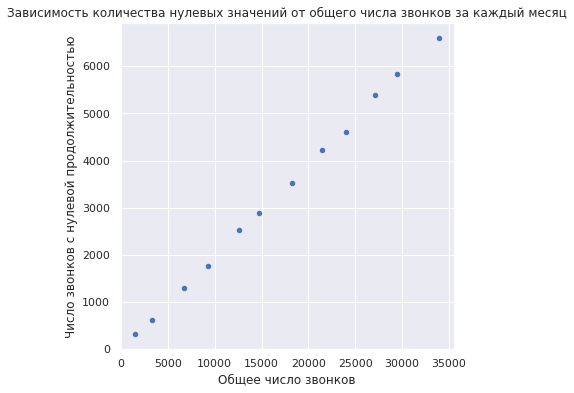

In [ ]:
from matplotlib.axes._axes import _log as matplotlib_axes_logger
matplotlib_axes_logger.setLevel('ERROR')

calls['month'] = calls['call_date'].dt.month

calls.loc[calls['duration'] == 0, 'nulls_count'] = 1
null_calls = calls.pivot_table(index='month', values=['id', 'nulls_count'], aggfunc='count')
null_calls['null_ratio'] = round(null_calls['nulls_count'] / null_calls['id'], 3)
null_calls.plot(x='id', y='nulls_count', kind='scatter', legend=False, figsize=(6,6))
plt.xlabel('Общее число звонков')
plt.ylabel('Число звонков с нулевой продолжительностью')
plt.title('Зависимость количества нулевых значений от общего числа звонков за каждый месяц')
plt.show()

На графике хорошо видна линейная положительная связь между числом звонков с нулевой продолжительностью и общим числом звонков. Округлим все значения в большую сторону (т.к. тариф считается по минутам), а нулевые значения заменим на 1.

In [ ]:
calls['duration'] = calls['duration'].apply(np.ceil)
calls.loc[calls['duration'] == 0, 'duration'] = 1

**Интернет-сессии**

Посмотрим, есть ли нулевые значения в таблице internet.

In [ ]:
print('Интернет-сессии с объемом потраченного трафика, равным нулю:', 
      internet.loc[internet['mb_used'] == 0, 'mb_used'].count())

Интернет-сессии с объемом потраченного трафика, равным нулю: 19598


Добавим столбец со значением месяца и построим график зависимости количества нулевых значений от общего числа интернет-сессий за каждый месяц

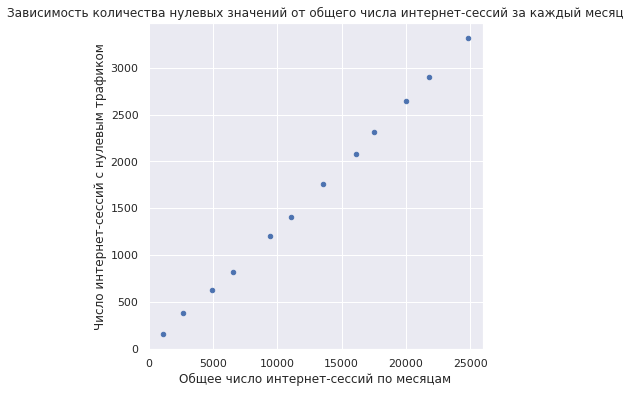

In [ ]:
internet['month'] = internet['session_date'].dt.month

internet.loc[internet['mb_used'] == 0, 'nulls_count'] = 1
null_mb = internet.pivot_table(index='month', values=['id', 'nulls_count'], aggfunc='count')
null_mb['null_ratio'] = round(null_mb['nulls_count'] / null_mb['id'], 3)
null_mb.plot(x='id', y='nulls_count', kind='scatter', legend=False, figsize=(6,6))
plt.xlabel('Общее число интернет-сессий по месяцам')
plt.ylabel('Число интернет-сессий с нулевым трафиком')
plt.title('Зависимость количества нулевых значений от общего числа интернет-сессий за каждый месяц')
plt.show()

Вывод по нулевым значениям интернет-сесссий аналогичен. Округлим все значения в большую сторону (т.к. тариф считается по мегабайтам), а нулевые значения заменим на 1.

In [ ]:
internet['mb_used'] = internet['mb_used'].apply(np.ceil)
internet.loc[internet['mb_used'] == 0, 'mb_used'] = 1

**Посчитаем следующие значения для каждого пользователя:**
- **количество сделанных звонков и израсходованных минут разговора по месяцам**
- **количество отправленных сообщений по месяцам**
- **объем израсходованного интернет-трафика по месяцам**
- **помесячную выручку с каждого пользователя**

Посчитаем количество сделанных звонков и израсходованных минут разговора по месяцам. Для этого объединим данные из users и calls, а затем построим сводную таблицу по каждому пользователю по месяцам

In [ ]:
calls_grouped = calls.pivot_table(values=['duration'],
                       index=['user_id', 'month'], 
                       aggfunc={'user_id': 'count', 'duration': 'sum'})
calls_grouped.columns = ['duration', 'calls']
calls_grouped.head()

duration  calls
user_id month                 
1000    5         164.0     22
        6         187.0     43
        7         346.0     47
        8         418.0     52
        9         478.0     58

Посчитаем количество отправленных сообщений по месяцам. Порядок действий аналогичен предыдущему (объединяем только в этот раз users и messages).

In [ ]:
messages['month'] = messages['message_date'].dt.month
messages_grouped = messages.pivot_table(values='id', 
                       index=['user_id', 'month'], 
                       aggfunc={'user_id': 'count'})
messages_grouped.columns = ['messages']
messages_grouped.head()

messages
user_id month          
1000    5            22
        6            60
        7            75
        8            81
        9            57

Посчитаем объем израсходованного интернет-трафика по месяцам. Порядок действий аналогичен предыдущему (объединяем только в этот раз users и internet).

In [ ]:
internet_grouped = internet.pivot_table(values='mb_used', 
                       index=['user_id', 'month'], 
                       aggfunc={'mb_used': 'sum'})
internet_grouped.columns = ['mb_used']
internet_grouped.head()

mb_used
user_id month         
1000    5       2257.0
        6      23262.0
        7      14017.0
        8      14072.0
        9      14583.0

Теперь объединим получившиеся сводные таблицы в одну grouped_data

In [ ]:
grouped_data = (calls_grouped
       .merge(messages_grouped, on=['user_id', 'month'], how='outer')
       .merge(internet_grouped, on=['user_id', 'month'], how='outer'))
grouped_data.head(10)

duration  calls  messages  mb_used
user_id month                                    
1000    5         164.0   22.0      22.0   2257.0
        6         187.0   43.0      60.0  23262.0
        7         346.0   47.0      75.0  14017.0
        8         418.0   52.0      81.0  14072.0
        9         478.0   58.0      57.0  14583.0
        10        363.0   57.0      73.0  14717.0
        11        344.0   43.0      58.0  14769.0
        12        341.0   46.0      70.0   9829.0
1001    11        444.0   59.0       NaN  18460.0
        12        430.0   63.0       NaN  14059.0

В таблице присутствуют NaN значения. Найдем их доли от общего чисила знчений.

In [ ]:
grouped_data.isna().mean()

duration    0.012446
calls       0.012446
messages    0.154636
mb_used     0.003423
dtype: float64

Т.к. данные были представлены в разных таблицах, после их объединения (сводная таблица по звонкам, по сообщениям и интернет-трафику) возникли пропущенные значения (например клиент мог в каком-то месяце не писать сообщений, но звонить и использовать интернет). Заменим их на нули.

In [ ]:
grouped_data.loc[grouped_data['duration'].isna(), 'duration'] = 0
grouped_data.loc[grouped_data['calls'].isna(), 'calls'] = 0
grouped_data.loc[grouped_data['messages'].isna(), 'messages'] = 0
grouped_data.loc[grouped_data['mb_used'].isna(), 'mb_used'] = 0

Проверим количество пропущенных значений.

In [ ]:
grouped_data.isna().sum()

duration    0
calls       0
messages    0
mb_used     0
dtype: int64

Пропусков больше нет. Выведем получишуюся таблицу.

In [ ]:
grouped_data.head(10)

duration  calls  messages  mb_used
user_id month                                    
1000    5         164.0   22.0      22.0   2257.0
        6         187.0   43.0      60.0  23262.0
        7         346.0   47.0      75.0  14017.0
        8         418.0   52.0      81.0  14072.0
        9         478.0   58.0      57.0  14583.0
        10        363.0   57.0      73.0  14717.0
        11        344.0   43.0      58.0  14769.0
        12        341.0   46.0      70.0   9829.0
1001    11        444.0   59.0       0.0  18460.0
        12        430.0   63.0       0.0  14059.0

Добавим в grouped_data наименование тарифа для каждого пользователя

In [ ]:
grouped_data = grouped_data.merge(users[['user_id', 'tariff']], on=['user_id'])
grouped_data.sample(5)

,user_id,duration,calls,messages,mb_used,tariff
585,1094,704.0,100.0,31.0,17742.0,ultra
2623,1413,138.0,15.0,6.0,21958.0,smart
2809,1439,500.0,71.0,12.0,22690.0,smart
2733,1429,386.0,45.0,0.0,27573.0,smart
2805,1439,341.0,55.0,5.0,20078.0,smart


Проверим количество пропущенных значений после объединения.

In [ ]:
grouped_data.isna().sum()

user_id     0
duration    0
calls       0
messages    0
mb_used     0
tariff      0
dtype: int64

Посчитаем помесячную выручку с каждого пользователя. Для этого напишем функцию для расчета выручки. Добавим столбец revenue с ее значением в таблицу.

In [ ]:
def revenue_calc(row):
    messages = row['messages']
    mb_used = row['mb_used']
    tariff = row['tariff']
    duration = row['duration']
    calls = row['calls']
    
    if tariff == 'smart':
        extra_minutes = duration - tariffs.loc[0, 'minutes_included']
        extra_gb = (mb_used - tariffs.loc[0, 'mb_per_month_included']) / 1024
        extra_sms = messages - tariffs.loc[0, 'messages_included']

        if extra_minutes < 0: extra_minutes = 0
        if extra_gb < 0: extra_gb = 0
        if extra_sms < 0: extra_sms = 0

        return (tariffs.loc[0, 'rub_per_message'] * extra_sms + 
                tariffs.loc[0, 'rub_per_gb'] * extra_gb + 
                tariffs.loc[0, 'rub_per_minute'] * extra_minutes + 
                tariffs.loc[0, 'rub_monthly_fee']) 

    else:
        extra_minutes = duration - tariffs.loc[1, 'minutes_included']
        extra_gb = (mb_used - tariffs.loc[1, 'mb_per_month_included']) / 1024
        extra_sms = messages - tariffs.loc[1, 'messages_included']
        
        if extra_minutes < 0: extra_minutes = 0
        if extra_gb < 0: extra_gb = 0
        if extra_sms < 0: extra_sms = 0

        return (tariffs.loc[1, 'rub_per_message'] * extra_sms + 
                tariffs.loc[1, 'rub_per_gb'] * extra_gb + 
                tariffs.loc[1, 'rub_per_minute'] * extra_minutes + 
                tariffs.loc[1, 'rub_monthly_fee'])
        

grouped_data['revenue'] = round(grouped_data.apply(revenue_calc, axis=1), 2)
grouped_data.head(10)

,user_id,duration,calls,messages,mb_used,tariff,revenue
0,1000,164.0,22.0,22.0,2257.0,ultra,1950.00
1,1000,187.0,43.0,60.0,23262.0,ultra,1950.00
2,1000,346.0,47.0,75.0,14017.0,ultra,1950.00
3,1000,418.0,52.0,81.0,14072.0,ultra,1950.00
4,1000,478.0,58.0,57.0,14583.0,ultra,1950.00
5,1000,363.0,57.0,73.0,14717.0,ultra,1950.00
6,1000,344.0,43.0,58.0,14769.0,ultra,1950.00
7,1000,341.0,46.0,70.0,9829.0,ultra,1950.00
8,1001,444.0,59.0,0.0,18460.0,smart,1155.47
9,1001,430.0,63.0,0.0,14059.0,smart,550.00


### Вывод: 
В рамках подготовки данных:
- заменили тип данных object у столбцов с датой на корректный datetime
- нашли в таблицах calls и internet нулевые значения в столбцах длительность звонка и объем потраченного трафика соответственно. Проанализировали зависимость количества нулевых значений от общего количества. Нашли зависимость: чем больше количество звонков и интернет-сессий, тем больше нулевый значений. Возможно это очень короткие по продолжительности звонки и интернет-сессии, но т.к. тариф считается по минутам и мегабайтам, приняли решение нулевые значения заменить на 1, а остальные значения округлить в большую сторону.
- добавили столбец со значением месяца в таблицы calls, internet, messages.
- посчитали следующие значения для каждого пользователя и объединили их в таблицу grouped_data:
    - количество сделанных звонков (calls) и израсходованных минут разговора по месяцам (duration)
    - количество отправленных сообщений по месяцам (messages)
    - объем израсходованного интернет-трафика по месяцам (mb_used)
    - помесячная выручка с каждого пользователя (revenue)

<a id="3"></a>
### Шаг 3. Проанализировать данные.

**Посчитаем сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц**

In [ ]:
means = grouped_data.pivot_table(index='user_id', values=['duration', 'messages', 'mb_used', 'revenue', 'tariff'], aggfunc='mean')
means = means.merge(users[['user_id', 'tariff']], on=['user_id'])
means = round(means, 2)   
means.head()

,user_id,duration,mb_used,messages,revenue,tariff
0,1000,330.12,13438.25,62.0,1950.00,ultra
1,1001,437.00,16259.50,0.0,852.74,smart
2,1002,223.00,16607.86,10.0,959.15,smart
3,1003,782.80,11466.20,76.0,1950.00,ultra
4,1004,128.00,18649.25,149.0,1950.00,ultra


<div class="alert alert-info"> <b>Комментарий студента:</b> Заменил цикл на добавление столбца с тарифом при помощи метода merge из таблицы users</div>

Проверим, есть ли пропуски в данных и найдем их долю.

In [ ]:
means.isna().mean()

user_id     0.0
duration    0.0
mb_used     0.0
messages    0.0
revenue     0.0
tariff      0.0
dtype: float64

Т.к. их доля 0.4%, удалим их.

In [ ]:
means.dropna(subset=['duration'], inplace=True)
means.isna().mean()

user_id     0.0
duration    0.0
mb_used     0.0
messages    0.0
revenue     0.0
tariff      0.0
dtype: float64

**Посчитаем среднее количество, дисперсию и стандартное отклонение**

In [ ]:
stats = means.pivot_table(index=['tariff'], values=['duration', 'mb_used', 'messages'], 
                    aggfunc={'duration': [np.mean, np.var, np.std], 
                             'mb_used': [np.mean, np.var, np.std], 
                             'messages': [np.mean, np.var, np.std]})
stats = round(stats, 2)
stats

duration                     mb_used                       messages  \
           mean     std       var      mean      std          var     mean   
tariff                                                                       
smart    431.15  148.81  22145.64  16209.37  3585.22  12853816.56    32.35   
ultra    541.98  289.11  83586.49  19594.61  8319.44  69213000.85    54.03   

                        
          std      var  
tariff                  
smart   26.51   702.91  
ultra   46.37  2149.83

Посмотрим диаграммы boxplot длительности звонка, объема потраченного трафика и количества сообщений. Сравним их для двух тарифов

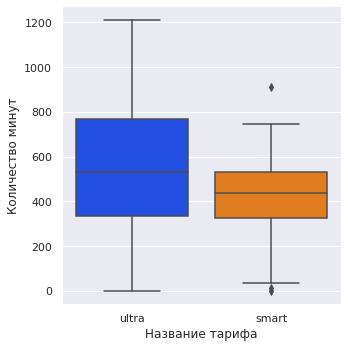

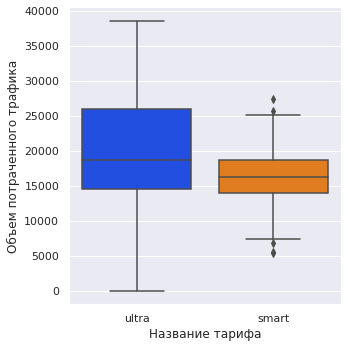

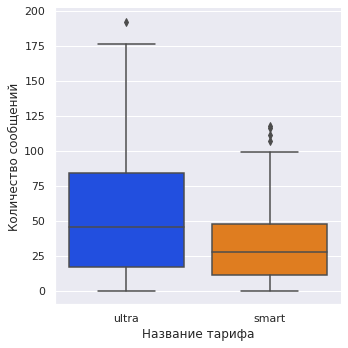

In [ ]:
for column in ['duration', 'mb_used', 'messages']:    
    sns.catplot(x="tariff", y=column, kind="box", data=means, palette='bright')
    plt.xlabel('Название тарифа')
    if column == 'duration':
        plt.ylabel('Количество минут') 
    if column == 'mb_used':
        plt.ylabel('Объем потраченного трафика')
    if column == 'messages':
        plt.ylabel('Количество сообщений')

Можно сделать следующие выводы:
- Разброс длительности разговора, объема потраченного трафика и количества сообщений у пользователей тарифа "Ультра" больше, чем у тарифа "Смарт". Это видно и по диаграммам boxplot и по значения дисперсии/стандартного отклонения из таблицы stats.
- Медианы средних значений (длительности разговора, объема потраченного трафика и количества сообщений) у пользователей тарифа "Ультра" выше, чем у тарифа "Смарт". Т.е. в среднем такие пользователи дольше разговаривают по телефону, больше отправляют сообщения и тратят интернет-трафика.
- Выбросы или аномальные значения чаще встречаются среди пользователей тарифа "Смарт". 

Оценим доли аномальных значений у тарифов Смарт и Ультра. Для этого сделаем срезы по выбранному тарифу, напишем функция для нахождения доли аномальных значений и выведем доли аномальных значений на экран по каждому тарифу.

In [ ]:
smart_data = means.query('tariff == "smart"')
ultra_data = means.query('tariff == "ultra"')

def wrong_ratio(data, column):
    p_25, p_75 = np.percentile(data[column], [25, 75]) #значения квартилей
    iqr = p_75 - p_25 #межквартальный размах
    upper_bound = round(p_75 + 1.5 * iqr, 2)
    if upper_bound > data[column].max():
        upper_bound = data[column].max()
    print(column + ':', 'Доля выбросов составляет: {:.1%}'.format(len(data.loc[data[column] > upper_bound]) / len(data)))
    
print('Доли выбросов тарифа "Смарт":')
print()
for column in ['duration', 'mb_used', 'messages']:
    wrong_ratio(smart_data, column)
print()
print('Доли выбросов тарифа "Ультра":')
print()
for column in ['duration', 'mb_used', 'messages']:
    wrong_ratio(ultra_data, column)        

Доли выбросов тарифа "Смарт":

duration: Доля выбросов составляет: 0.3%
mb_used: Доля выбросов составляет: 0.6%
messages: Доля выбросов составляет: 1.1%

Доли выбросов тарифа "Ультра":

duration: Доля выбросов составляет: 0.0%
mb_used: Доля выбросов составляет: 0.0%
messages: Доля выбросов составляет: 0.7%


Доля таких пользователей невелика. Возможно им следует порекомендовать перейти на другой тариф, например Ультра.

**Построим гистограммы**

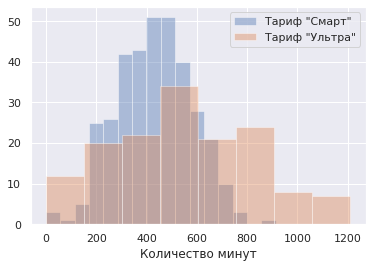

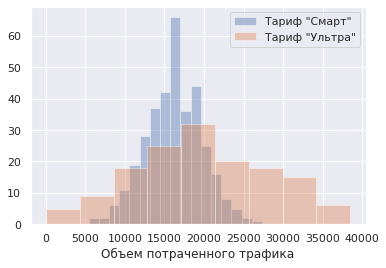

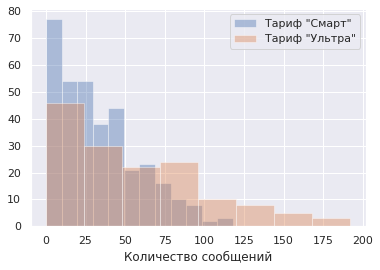

In [ ]:
for column in ['duration', 'mb_used', 'messages']:
    sns.distplot(smart_data[column], kde=False, label='smart')
    sns.distplot(ultra_data[column], kde=False, label='ultra')
    plt.legend(['Тариф "Смарт"', 'Тариф "Ультра"'])
    if column == 'duration':
        plt.xlabel('Количество минут') 
    if column == 'mb_used':
        plt.xlabel('Объем потраченного трафика')
    if column == 'messages':
        plt.xlabel('Количество сообщений')
    plt.show()

По гистограммам видно, что:
- Разброс значений (количество минут, объем трафика и количество сообщений) выше у тарифа "Ультра"
- Лучше выражена мода (пик на гистограмме) у тарифа "Смарт".
- Распределение параметров количества минут и объема трафика по форме больше напоминает нормальное распределение, тогда как распределение количества сообщения - распределение Пуассона. Т.е. основное число пользователей отправляет достаточно мало сообщений. А тех, кто отправляет их много - можно сказать единицы.


Выражаясь другими словами, пользователи тарифа "Ультра" разнообразнее расходуют бесплатный лимит, что вполне логично, ведь в тариф "Ультра" включено больше минут, сообщений и трафика. 

### Вывод:
В рамках анализа данных сравнили поведение пользователей двух тарифов. Было замечено, что средние значения и разброс по всем параметрам (количество минут, объем трафика, количество сообщений) больше у пользователей тарифа "Ультра". Это видно как по средним значениям и стандартным отклонениям, так и по графикам (диаграммы boxplot и гистограммы). Это вполне логично, т.к. пользователи тарифа "Ультра" не так ограничены бесплатным лимитом тарифа, как пользователи "Смарт". Также замечено, что распределение параметров количества минут и объема трафика по форме больше напоминает нормальное распределение, тогда как распределение количества сообщения - распределение Пуассона.

<a id="4"></a>
### Шаг 4. Проверить гипотезы.

**Проверим гипотезу: средняя выручка пользователей тарифов «Ультра» и «Смарт» различается**

`H0` - Нулевая гипотеза заключается в том, что средние значения выручки равны.  
`H1` - Альтернативная гипотеза будет, что средние значения выручки не равны.  
`alpha` - уровень значимости для проверки гипотез примем 1%  
Для проверки гипотезы воспользуемся тестом Стьюдента.

In [ ]:
ultra = grouped_data.query('tariff == "ultra"')['revenue']
smart = grouped_data.query('tariff == "smart"')['revenue']

alpha = .01

results = st.ttest_ind(
    ultra, 
    smart, 
    equal_var=False)

print('Среднее значение выручки тарифа "Ультра":', round(ultra.mean(),2))
print('Среднее значение выручки тарифа "Смарт":', round(smart.mean(),2))
print('________________________________________________')
print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

Среднее значение выручки тарифа "Ультра": 2060.59
Среднее значение выручки тарифа "Смарт": 1251.41
________________________________________________
p-значение: 2.4533519468353593e-281
Отвергаем нулевую гипотезу


Выводы: 
- пользователи тарифа "Смарт" тратят в среднем более, чем в 2 раза больше денег, чем стоимость тарифного плана;
- доходы с пользователей тарифа "Ультра" выше. Т.е. для оператора "Мегалайн" такие пользователи более выгодные.

**Проверим гипотезу: средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов**

`H0` - Нулевая гипотеза заключается в том, что средние значения выручки пользователей из Москвы и других регионов равны.  
`H1` - Альтернативная гипотеза будет, что средние значения выручки не равны.  
`alpha` - уровень значимости для проверки гипотез примем 1%  
Для проверки гипотезы воспользуемся тестом Стьюдента.

Для начала добавим в таблицу столбец с наименованием города проживания.

In [ ]:
#for user in grouped_data.index:
#    grouped_data.loc[user, 'city'] = users.loc[user[0]-1000, 'city']
grouped_data = grouped_data.merge(users[['user_id', 'city']], on=['user_id'])
moscow = grouped_data.query('city == "Москва"')['revenue']
regions = grouped_data.query('city != "Москва"')['revenue']

alpha = .01

results = st.ttest_ind(
    moscow, 
    regions, 
    equal_var=False)
print('Среднее значение выручки пользователей из Москвы:', round(moscow.mean(),2))
print('Среднее значение выручки пользователей из регионов:', round(regions.mean(),2))
print('________________________________________________')
print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

Среднее значение выручки пользователей из Москвы: 1517.75
Среднее значение выручки пользователей из регионов: 1495.09
________________________________________________
p-значение: 0.5030016583388277
Не получилось отвергнуть нулевую гипотезу


<div class="alert alert-info"> <b>Комментарий студента:</b> Заменил цикл на добавление столбца с городом при помощи метода merge из таблицы users</div>

Выводы:
- в среднем пользователи из регионов приносят оператору "Мегалайн" примерно столько же выручки, сколько пользователи из Москвы

### Вывод:
В рамках этапа проверки гипотез было выявлено, что:
1. Средняя выручка пользователей тарифов «Ультра» и «Смарт» различается. Средняя выручка пользователей тарифа "Ультра" почти в 1.7 раз больше.
2. Не найдено существенных различий между средними выручками пользователей из Москвы и других регионов.

<a id="5"></a>
### Шаг 5. Написать общий вывод.

**В рамках задачи определения перспективного тарифа для телеком компании сделаны следующие выводы:**
1. Прочитали пять файлов с данными с информацией о 500 пользователей "Мегалайна"
2. Провели подготовку данных к дальнейшей работе
    - заменили тип данных у столбцов с датой;
    - нашли нулевые значения в столбцах длительность звонка и объем потраченного трафика, которые заменили на единицу. Остальные значения были округлены в большую сторону, т.к. тариф считается по минутам и мегабайтам.
    - объединили данные из разных таблиц;
    - посчитали следующие значения для каждого пользователя:
        - количество сделанных звонков и израсходованных минут разговора по месяцам;
        - количество отправленных сообщений по месяцам;
        - объем израсходованного интернет-трафика по месяцам;
        - помесячная выручка с каждого пользователя.
3. Проанализировали поведение пользователей двух тарифов "Смарт и Ультра":
    - Было замечено, что средние значения и разброс по всем параметрам (количество минут, объем трафика, количество сообщений) больше у пользователей тарифа "Ультра". Это было видно как по средним значениям и стандартным отклонениям, так и по графикам (диаграммы boxplot и гистограммы) 
    - Распределение параметров количества минут и объема трафика по форме больше напоминает нормальное распределение, тогда как распределение количества сообщения - распределение Пуассона. Т.е. основное число пользователей отправляет достаточно мало сообщений. И количество пользователей уменьшается с увеличением числа сообщений.
4. Проверили гипотезы о влиянии средней выручки от тарифа и от города проживания:
    - Средняя выручка пользователей тарифов «Ультра» и «Смарт» различается. Средняя выручка пользователей тарифа "Ультра" почти в 1.7 раз больше.
    - Не найдено различий между средними выручками пользователей из Москвы и других регионов. 

**Резюмирая выше сказанное и, отвечая на вопрос: "Какой тариф лучше?" - доходы от тарифа "Ультра" больше, чем от тариф "Смарт".**
